In [ ]:
                                            """Classifying tweets"""

In [26]:
"""For this particular assignment I have obtained a labelled dataset from Vinaykoal's github page.
The data contains tweets of two major categories 'Sports' and 'Politics'.

The following code shows two approaches to the tweet classification

1. supervised learning approach 

2. Unsupervised learning approach



"""

In [ ]:
                                        """Supervised learning Approach"""

In [41]:
#reading the data

col_names = ['category', 'tweet']
df = pd.read_csv('/Users/moukthika/Desktop/wkc/data_twitter.csv', names = col_names, encoding = 'latin1')
df.sample(frac=1)
df.head(10)

#the dataset contains tweets and the corresponding label. The primary classes are 'sports' and 'politics'.

,category,tweet
0,Sports,99 days to go until the start of #ct13 did you...
1,Sports,tonight scottish first division match between ...
2,Sports,10 off the over 10 required captain faulkner t...
3,Politics,. gsanetwork raises awareness &amp stands up t...
4,Sports,another wonderful start from england new ball ...
5,Politics,#food minister there will now be legal entitle...
6,Sports,precious four to hartley with time running out...
7,Politics,blasts deja vu how many times have we been in ...
8,Politics,rt @fa books book of the day why the occasiona...
9,Sports,#djokovic wants to keep it sweet #ausopen #3pe...


In [42]:
#playing around with data
print( df.tweet[395], ":", df.category[395])

for the french in mali expelling the islamists was the easy part now what http //t co 2rcfieyscl : Politics


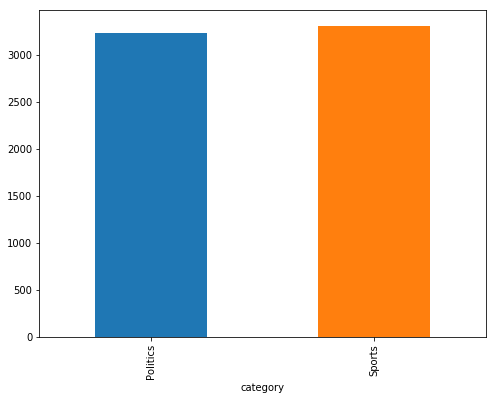

In [43]:
#plotting the data to understand the distribution of the tweets among the two classes. 

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('category').tweet.count().plot.bar(ylim=0)
plt.show()


In [ ]:
"""From the above plot, it is clear that there are more sports tweets in the data set than political tweets"""

In [44]:
#preprocessing the data before vectorising it.

porter = PorterStemmer()
def preprocessing(string):
    words = nltk.word_tokenize(string) #splitting the sentences into words
    words = [w.lower() for w in words] #converting all words to lower case to avoid have separate vectors for words such as "now" and "Now" i
    #words = [word for word in words if word.isalpha()] #removing everything that is not alphabetic to get rid of punctuations.
    
    """it is good to retain the non-alpha numeric characters here because a lot is expressd through hashtags, @ and other symbols
    as it is a microbloggig site allowing a user to type only a certain number of words."""
    
    stop_words = stopwords.words('english')
    words = [w for w in words if not w in stop_words] 
    
    stemmed = [porter.stem(word) for word in words] #to reduce the word to it's root/base. Since we are not looking at a deeper meaning of a word here and want to reduce the vocanulary size.
    words = stemmed
    return words

In [45]:
"""Since we cannot work with text directly for ML algorithms, the text has to be converted to meaninful numbers. 
One way of doing it is with Bag of Words model.
In Bag of Words model one can get rid of the sequential data (which is language) and only focus on the word occurances, 
Tfidf is one type of Bag of Words model. 
This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.
Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents."""

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10, max_df = 15, norm='l2', encoding='latin-1', ngram_range=(1,3), tokenizer = preprocessing)

features = tfidf.fit_transform(df.tweet).toarray() #the tfidf vectors of the questions will serve as features
labels = df.category
features.shape




(6550, 741)

In [46]:
#splitting the test and train set

X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['category'], random_state = 42, test_size = 0.2)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
                        """Understanding how each algorithm is performing on the dataset"""

In [ ]:
                                            """Using Naive Bayes"""

In [47]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB(alpha = 1.0)
clf_nb = model_nb.fit(X_train_tfidf, y_train)

In [48]:
prediction_nb =  clf_nb.predict(count_vect.transform(X_test))
print(accuracy_score(y_test, prediction_nb))

#the accuracy for naive bayes is quite good and even the predictions made are quite accurate when hashtags are given as the input

0.9564885496183206


In [105]:
print(clf_nb.predict(count_vect.transform(["#indvaus"])))
print(clf_nb.predict(count_vect.transform(["#EU"])))
print(clf_nb.predict(count_vect.transform(["#white house"])))
print(clf_nb.predict(count_vect.transform(["#MAKEAMERICAGREATAGAIN!"])))
print(clf_nb.predict(count_vect.transform(["#rafalnadal"])))
print(clf_nb.predict(count_vect.transform(["#trump2016"])))

['Sports']
['Politics']
['Politics']
['Politics']
['Sports']
['Politics']


In [ ]:
                                                """Using SVM"""

In [50]:
from sklearn import svm
model_svm = svm.LinearSVC()
clf_svm = model_svm.fit(X_train_tfidf, y_train)

In [51]:
prediction_svm = clf_svm.predict(count_vect.transform(X_test))
print(accuracy_score(y_test, prediction_svm))

#the accuracy is lesser than Naive bayes, even the prediction for one hashtag is not correct

0.916793893129771


In [104]:
print(clf_svm.predict(count_vect.transform(["#indvaus"])))
print(clf_svm.predict(count_vect.transform(["#trump2016"])))
print(clf_svm.predict(count_vect.transform(["#MAKEAMERICAGREATAGAIN!"])))

['Sports']
['Politics']
['Sports']


In [175]:
                                            """Random Forest"""

'Random Forest'

In [100]:
from sklearn.ensemble import RandomForestClassifier 
model_rc=RandomForestClassifier(n_estimators=100, random_state = 42)
model_rc.fit(X_train_tfidf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [101]:
prediction_rc = model_rc.predict(count_vect.transform(X_test))
print(accuracy_score(y_test, prediction_rc))

#accuracy is much lesser and the predictions are not right for the poiltical tweets

0.9045801526717557


In [117]:
print(model_rc.predict(count_vect.transform(["#usopen"])))
print(model_rc.predict(count_vect.transform(["#MAKEAMERICAGREATAGAIN!"])))
print(model_rc.predict(count_vect.transform(["#trump2016"])))
print(model_rc.predict(count_vect.transform(["#tennis"])))

['Sports']
['Sports']
['Sports']
['Sports']


In [ ]:

                                        """KNeighbours classifier"""

In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
prediction_knn = clf_knn.predict(count_vect.transform(X_test))
print(accuracy_score(y_test, prediction_knn))

#accuracy not as good and even predictions are not great for political tweets

0.9129770992366413


In [107]:
print(clf_knn.predict(count_vect.transform(["#ausopen"])))
print(model_rc.predict(count_vect.transform(["#MAKE AMERICA GREAT AGAIN!"])))
print(model_rc.predict(count_vect.transform(["#trump2016"])))

['Sports']
['Sports']
['Sports']


In [ ]:
                                            """Decision Tree"""

In [82]:
from sklearn import tree
model_dt=tree.DecisionTreeClassifier()
model_dt.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
prediction_dt = model_dt.predict(count_vect.transform(X_test))
print(accuracy_score(y_test, prediction_dt))

#very low accuracy, and the predictions are also pretty off.

0.7641221374045801


In [108]:
print(model_dt.predict(count_vect.transform(["#ausopen"])))
print(model_dt.predict(count_vect.transform(["#Hillary"])))
print(model_dt.predict(count_vect.transform(["#trump2016"])))

['Sports']
['Politics']
['Sports']


In [ ]:
"""From the above experiment, it is clear that Naive Bayes with close to 96 % accuracy is working best to 
classify a particular hashtag into a category on which the tweets have been trained."""

In [ ]:
                                    """Unsupervised Learning Approach"""

In [ ]:
"""This is an attempt to understand the tweet categories in the dataset with the help of a topic modeling
technique called Latent Dirichlet Allocation(LDA)."""

In [109]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary, bleicorpus
import numpy
from gensim.matutils import hellinger
from nltk.tokenize import word_tokenize

In [110]:
##getting the data used above, but without the 'sports' and 'politics' labels
docs = []
store = ""
file = open("/Users/Moukthika/Desktop/wkc/twitter_ldc.csv", 'r', encoding = 'latin1')
reader = csv.reader(file)
for row in reader:
    for i in row:
        docs.append(i)
    

print(docs)

['99 days to go until the start of #ct13 did you know chris gayle is the only player in the event u2019s history to be dismissed for 99', 'tonight scottish first division match between dumbarton and raith rovers has been postponed due to frozen pitch http //t co drlbdwmtsl', '10 off the over 10 required captain faulkner to bowl the last over in close discussion with veteran warne final spot on the line #bbl02', '. gsanetwork raises awareness &amp stands up to stop #lgbt #bullying in school &amp online http //t co fwig5vvvmi @glaad', 'another wonderful start from england new ball pair anderson and finn have been right on the money nz 6-1 from four overs #nzveng', '#food minister there will now be legal entitlement along with monetary benefits with the food security bill', 'precious four to hartley with time running out #bbl02 #bigfinals', 'blasts deja vu how many times have we been in this *exact moment failed or ignored intel no cctvs blame game and innocents dead', 'rt @fa books book 

In [111]:
#preprocessing the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [112]:
def clean(d):
    stop_free = " ".join([i for i in d.lower().split() if i not in stop])
    #punc_free = ''.join(ch for ch in stop_free if ch not in exclude) #to retain hashtags
    normalized = " ".join(word for word in punc_free.split() if len(word)>4)
    return normalized

In [113]:
doc_clean = [clean(d).split() for d in docs]
print(doc_clean)
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean] #generating a document-term matrix

[['start', 'chris', 'gayle', 'player', 'event', 'u2019s', 'history', 'dismissed'], ['tonight', 'scottish', 'first', 'division', 'match', 'dumbarton', 'raith', 'rovers', 'postponed', 'frozen', 'pitch', 'drlbdwmtsl'], ['required', 'captain', 'faulkner', 'close', 'discussion', 'veteran', 'warne', 'final', 'bbl02'], ['gsanetwork', 'raises', 'awareness', 'stands', 'bullying', 'school', 'online', 'fwig5vvvmi', 'glaad'], ['another', 'wonderful', 'start', 'england', 'anderson', 'right', 'money', 'overs', 'nzveng'], ['minister', 'legal', 'entitlement', 'along', 'monetary', 'benefits', 'security'], ['precious', 'hartley', 'running', 'bbl02', 'bigfinals'], ['blasts', 'times', 'exact', 'moment', 'failed', 'ignored', 'intel', 'cctvs', 'blame', 'innocents'], ['books', 'occasional', 'financial', 'bubble', 'necessary', 'innovation', 'ogqkx8ho'], ['djokovic', 'wants', 'sweet', 'ausopen', '3peat', 'm2ymtctx'], ['vijay', 'indvaus', 'fvnl1ktpb1'], ['first', 'white', 'thick', 'flies', 'thrid', 'bbl02', 'bi

In [114]:
#using LDA algorithm from Gensim

Lda = gensim.models.ldamodel.LdaModel

In [115]:
#training our lda model
"""although we know that there are two major topics in the data, the num_topics is initiated to 5 to understand how the algorithm 
extracts the topics from the dataset"""

lda_model = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=20)


In [116]:
print(lda_model.print_topics(num_topics=5, num_words=3))

[(0, '0.011*"medvedev" + 0.007*"u2019s" + 0.006*"president"'), (1, '0.026*"indvaus" + 0.016*"fvnl1ktpb1" + 0.012*"conference"'), (2, '0.009*"gbfedcup" + 0.008*"england" + 0.007*"ausopen"'), (3, '0.007*"putin" + 0.006*"vladimir" + 0.005*"world"'), (4, '0.016*"president" + 0.013*"bbl02" + 0.011*"obama"')]


In [ ]:
                                        """Understanding the output"""

#the first topic is about politics containing the words medvedev, president nad 2018
#the second topic is sports as it has returned the words indvsaus aling with a hashtag and conference
#The third is also sports
#fourth is politics
#and fifth is politics too. 

#So clearly there are two major topics
#let us try with num_topics = 2

In [121]:
lda_model = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=20)


In [122]:
print(lda_model.print_topics(num_topics=2, num_words=3))

[(0, '0.011*"president" + 0.008*"obama" + 0.005*"bbl02"'), (1, '0.011*"indvaus" + 0.007*"fvnl1ktpb1" + 0.005*"video"')]


In [ ]:
#the two topics are thus politics and sports
#however we will not be able to categorize a particular hastag into one of the two categories, we can still certainly classify 
#the topics and possibly get the distances of the hastags with one of the above topics identified. 